# Simple Linear Regression Model for predicting the monthly stipend of researchers based on the research experiences in years

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
d=pd.read_csv("Stipend_Data.csv")
d.head(15)

,ReserachExperience,Stipend
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


In [3]:
d.shape

(30, 2)

In [4]:
d.isnull().sum()

ReserachExperience    0
Stipend               0
dtype: int64

In [5]:
# Renaming columns

In [6]:
d.rename(columns = {'ReserachExperience':'rexp'}, inplace=True)

In [7]:
d.columns

Index(['rexp', 'Stipend'], dtype='object')

In [8]:
d.rename(columns={'Stipend':'stpnd'},inplace=True)

In [9]:
d.head()

,rexp,stpnd
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


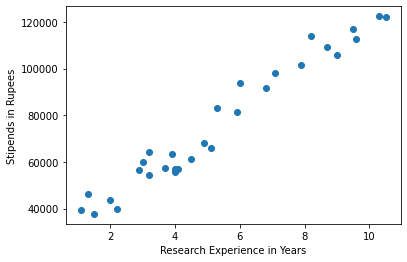

In [10]:
# plotting the data points

plt.scatter(d['rexp'],d['stpnd'])
plt.xlabel('Research Experience in Years')
plt.ylabel('Stipends in Rupees')
plt.show()


# Checking outliers

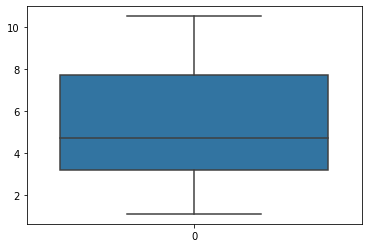

In [11]:
sns.boxplot(d['rexp'])
plt.show()

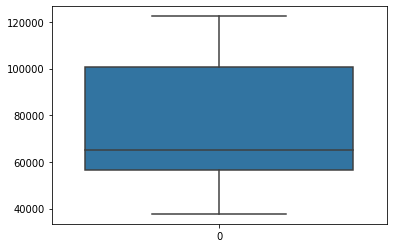

In [12]:
sns.boxplot(d['stpnd'])
plt.show()

# Split the data into dependent and independent variables

In [13]:
x=d.iloc[:,0:1]
y=d.iloc[:,1:2]

In [14]:
x.head()

,rexp
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2


In [15]:
y.head()

,stpnd
0,39343
1,46205
2,37731
3,43525
4,39891


# Splitting data for training and testing

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
xtrn,xtst,ytrn,ytst = train_test_split(x,y,test_size=0.2,random_state=13)

In [18]:
xtrn.shape

(24, 1)

In [19]:
xtrn

,rexp
7,3.2
29,10.5
17,5.3
21,7.1
0,1.1
19,6.0
4,2.2
11,4.0
9,3.7
27,9.6


In [20]:
xtst.shape

(6, 1)

In [21]:
xtst

,rexp
22,7.9
15,4.9
26,9.5
1,1.3
25,9.0
8,3.2


In [22]:
ytrn.shape

(24, 1)

In [23]:
ytrn

,stpnd
7,54445
29,121872
17,83088
21,98273
0,39343
19,93940
4,39891
11,55794
9,57189
27,112635


In [24]:
ytst.shape

(6, 1)

In [25]:
ytst

,stpnd
22,101302
15,67938
26,116969
1,46205
25,105582
8,64445


# building simple linear regression model

In [26]:
from sklearn.linear_model import LinearRegression

lreg=LinearRegression()
lreg

LinearRegression()

In [27]:
lreg.fit(xtrn,ytrn)

LinearRegression()

In [39]:
m=lreg.coef_
m

array([[9785.22969718]])

In [40]:
c=lreg.intercept_
c

array([23674.77539287])

In [59]:
print('Equation of Best Fit Line:\nY=',*m,'*X+',*c,sep='')

Equation of Best Fit Line:
Y=[9785.22969718]*X+23674.775392865355


# Prediction for the test data through the model

In [60]:
ypred=lreg.predict(xtst)
ypred

array([[100978.09000057],
       [ 71622.40090904],
       [116634.45751606],
       [ 36395.5739992 ],
       [111741.84266747],
       [ 54987.51042384]])

In [61]:
ytst

,stpnd
22,101302
15,67938
26,116969
1,46205
25,105582
8,64445


# Checking validity of the model

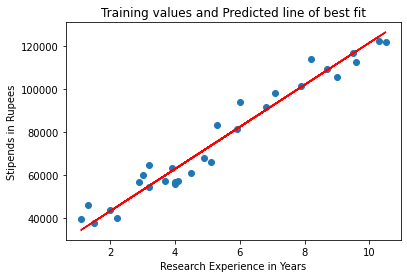

In [62]:
# plot the line

plt.scatter(x,y)
plt.plot(xtrn,lreg.predict(xtrn),color='red')
plt.title('Training values and Predicted line of best fit')
plt.xlabel('Research Experience in Years')
plt.ylabel('Stipends in Rupees')
plt.show()


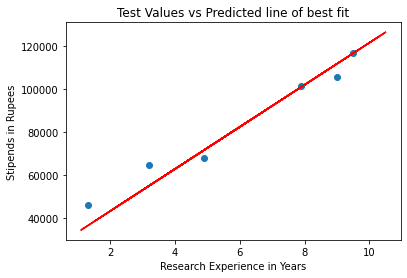

In [63]:
plt.title("Test Values vs Predicted line of best fit")
plt.scatter(xtst,ytst)
plt.plot(xtrn,lreg.predict(xtrn),color='red')
plt.xlabel('Research Experience in Years')
plt.ylabel('Stipends in Rupees')
plt.show()

##  R^2 score

In [64]:
from sklearn.metrics import r2_score

In [65]:
r2=r2_score(ytst,ypred)
print('The model will predict the stipend based on research experience with an accuracy upto',100*round(r2,4),'percent')

The model will predict the stipend based on research experience with an accuracy upto 93.94 percent
